## Perform dictionary learning (and atom extraction) from the MNIST dataset
 * Dictionary learning finds atoms to form a sparse representation of input data
 * Complex input can be seen as a sparse combination of primitive components.
 * MNIST digits can be seen as a sparse combination of all possible ink strokes.

In [27]:
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

## Explore Data

In [29]:
digits.data.shape

(1797, 64)

This process can be very long on low-end machines. In such a case,
limit the number of samples to 20 or 30.

In [30]:
sample = digits.data[:40,:]

In [31]:
sample.shape

(40, 64)

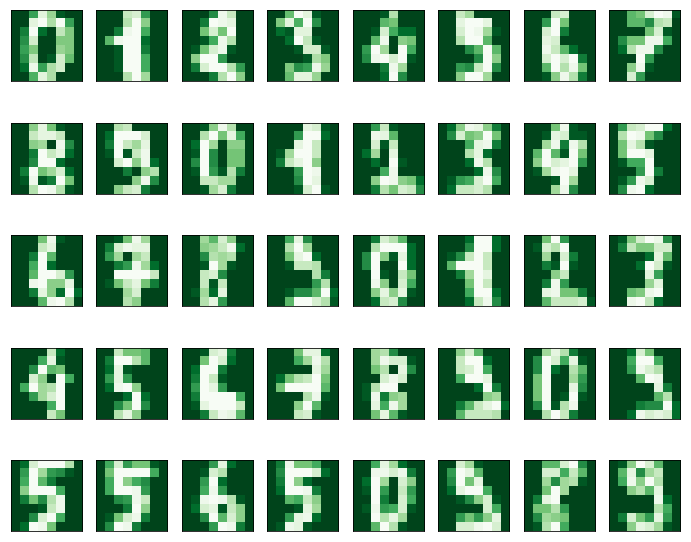

In [32]:
fig = plt.figure(figsize = (12, 10))  

for i in range(40):
    
    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(sample[i].reshape(8, 8), cmap = 'Greens_r',interpolation = 'nearest')

## DictionaryLearning
* Finds a dictionary (a set of atoms) that can best be used to represent data using a sparse code.
* n_components : number of dictionary elements to extract
* fit_algorithm : lars uses the least angle regression method to solve the lasso problem 
* transform_algorithm : Algorithm used to transform the data lars: uses the least angle regression method 
* lasso_lars: uses Lars to compute the Lasso solution

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.DictionaryLearning.html

In [33]:
from sklearn.decomposition import DictionaryLearning

dict_learn = DictionaryLearning(n_components = 36, fit_algorithm = 'lars', transform_algorithm = 'lasso_lars')

## fit_transform
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [34]:
X_dict = dict_learn.fit_transform(sample)

In [35]:
X_dict.shape

(40, 36)

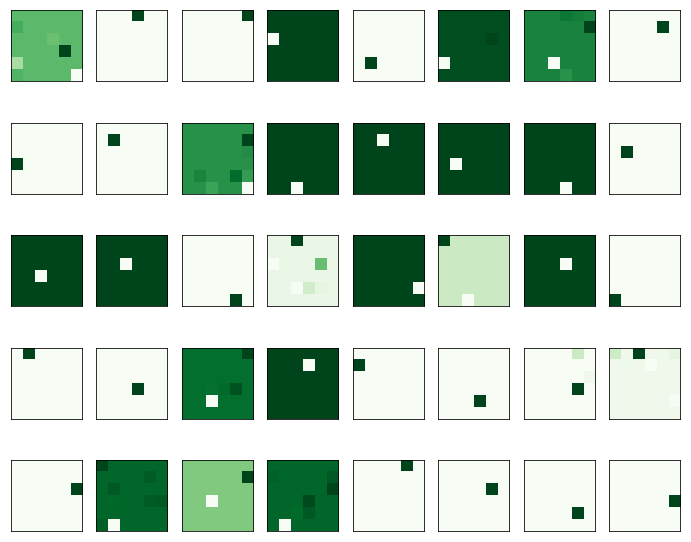

In [36]:
fig = plt.figure(figsize=(12, 10))  

for i in range(40):

    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_dict[i].reshape(6, 6), cmap = 'Greens_r',interpolation = 'nearest')

## Recreate features from atoms

components_ : array, [n_components, n_features] - dictionary atoms extracted from the data

In [37]:
dict_learn.components_.shape

(36, 64)

In [38]:
X_dict.shape

(40, 36)

In [39]:
import numpy as np

original = np.matmul(X_dict, dict_learn.components_)

In [40]:
original.shape

(40, 64)

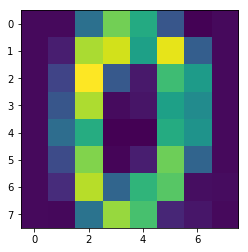

In [42]:
plt.imshow(original[0].reshape(8, 8))

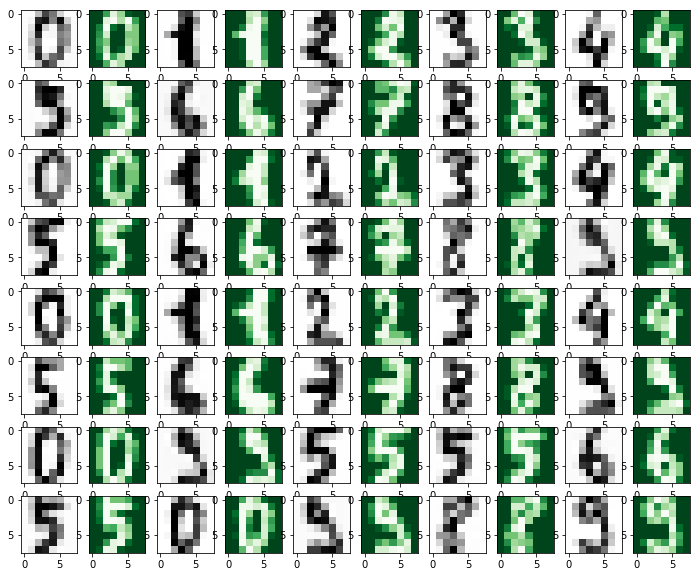

In [43]:
fig = plt.figure(figsize = (12, 10))  
a = 0
b = 0

for i in range(80):
    
    if i%2==0:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(original[a].reshape(8, 8), cmap = 'Greys')
        a+=1
    else:
        ax = plt.subplot(8, 10, i+1 )
        ax.imshow(sample[b].reshape(8, 8), cmap = 'Greens_r')
        b+=1

## Feature Selection using PCA


In [1]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
boston_df = pd.read_csv('datasets/boston.csv')

boston_df.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
FEATURES = list(boston_df.columns[:-1])

FEATURES

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [19]:
len(FEATURES)

12

## Apply PCA
* PCA: Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* explained_variance_ : The amount of variance explained by each of the selected components.
* components_ : Principal axes in feature space, representing the directions of maximum variance in the data.
* fit_transform : Fit the model with X and apply the dimensionality reduction on X

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [4]:
from sklearn.decomposition import PCA

def apply_pca(X, n, add_constant = False):
    
    pca = PCA(n_components = n)  
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)    
        
    return pca, pd.DataFrame(x_new)

In [5]:
pca, _ = apply_pca(boston_df[FEATURES], len(FEATURES))

In [7]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]


In [8]:
sum(pca.explained_variance_ratio_)

1.0

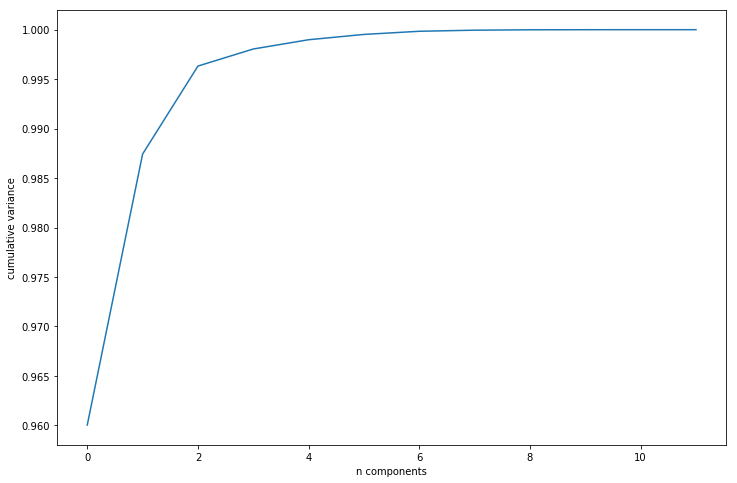

In [20]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

## Build model

In [21]:
def build_model(regression_fn,                
                target, 
                features, 
                dataset,
                *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]

    _ , X_new = apply_pca(X, *hyperparameters)

    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test) 
    
    return {
            'x_initial' : X,
            'x_transform': X_new,
            'x_train' : x_train,
            'x_test'  : x_test, 
            'y_train' : y_train,
            'y_test'  : y_test,
            'y_pred'  : y_pred,
            'model'   : model
           }     

In [22]:
def ols_reg(x_train, y_train):
    
    ols = sm.OLS(y_train, x_train)
    
    model = ols.fit()
    
    return model

In [23]:
def linear_reg(x_train, y_train):
    
    model = LinearRegression().fit(x_train, y_train)
    
    return model

## Statsmodel 

In [14]:
model_params = {}

In [24]:
model_params['statsmodel_reg'] = build_model(ols_reg,
                                            'Median Home Value',
                                            FEATURES,
                                            boston_df,
                                            6,
                                            True)

In [25]:
model       = model_params['statsmodel_reg']['model']
x_initial   = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train     = model_params['statsmodel_reg']['x_train']
x_test      = model_params['statsmodel_reg']['x_test']
y_train     = model_params['statsmodel_reg']['y_train']
y_test      = model_params['statsmodel_reg']['y_test']
y_pred      = model_params['statsmodel_reg']['y_pred']

### Visualize transformed results

In [26]:
x_transform.shape

(506, 7)

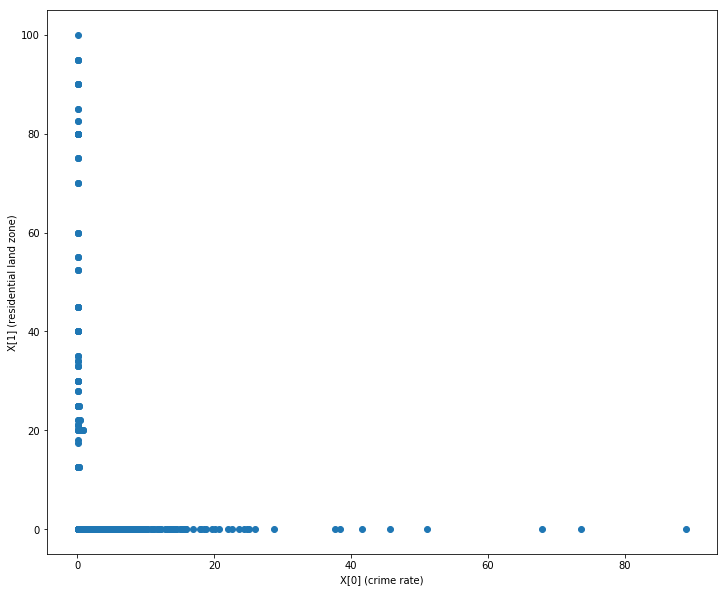

In [27]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_initial['crime rate'], x_initial['residential land zone'], cmap = 'Spectral')
plt.xlabel('X[0] (crime rate)')
plt.ylabel('X[1] (residential land zone)');

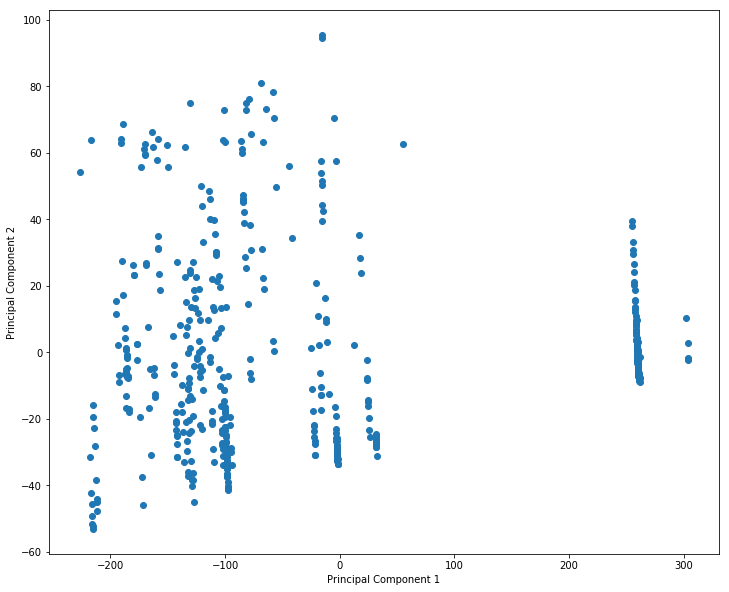

In [28]:
fig, ax = plt.subplots(figsize = (12,10))

ax.scatter(x_transform[1], x_transform[2], cmap = 'Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [29]:
print('Rsquared: ', model.rsquared)
print('Adjusted Rsquared: ', model.rsquared_adj)

Rsquared:  0.5878255241683413
Adjusted Rsquared:  0.5815961870021198


## Sklearn Model

In [32]:
model_params['sklearn_reg'] = build_model(linear_reg,
                                          'Median Home Value',
                                           FEATURES,
                                           boston_df,
                                           6)

In [33]:
model       = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train     = model_params['sklearn_reg']['x_train']
x_test      = model_params['sklearn_reg']['x_test']
y_train     = model_params['sklearn_reg']['y_train']
y_test      = model_params['sklearn_reg']['y_test']
y_pred      = model_params['sklearn_reg']['y_pred']

In [34]:
x_transform.shape

(506, 6)

In [35]:
print('Training score: ', model.score(x_train, y_train))
print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.5991266411349765
Testing score:  0.5120368971344347


### Applying LDA on a feature set for classfication

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load, Explore and Pre-process Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
X = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [5]:
X.shape

(178, 13)

In [7]:
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
41,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0


In [17]:
target_names = wine.target_names

target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
y = wine.target

y.shape

(178,)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Text(0, 0.5, 'non flavanoid phenols')

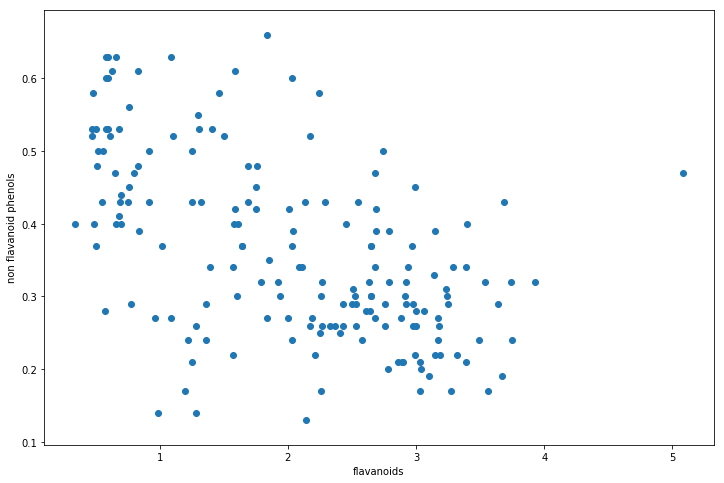

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(X['flavanoids'], X['nonflavanoid_phenols'])

plt.xlabel('flavanoids')
plt.ylabel('non flavanoid phenols')

Text(0, 0.5, 'wine type')

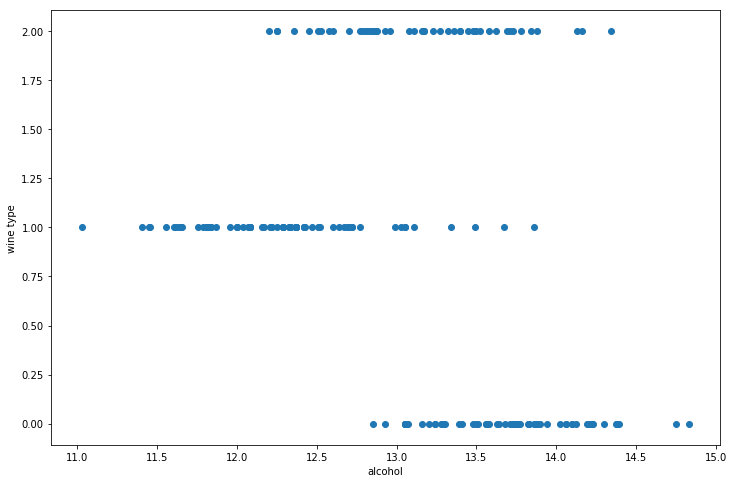

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X['alcohol'], pd.DataFrame(data = y))

plt.xlabel('alcohol')
plt.ylabel('wine type')

In [15]:
wine_corr = X.corr()

wine_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


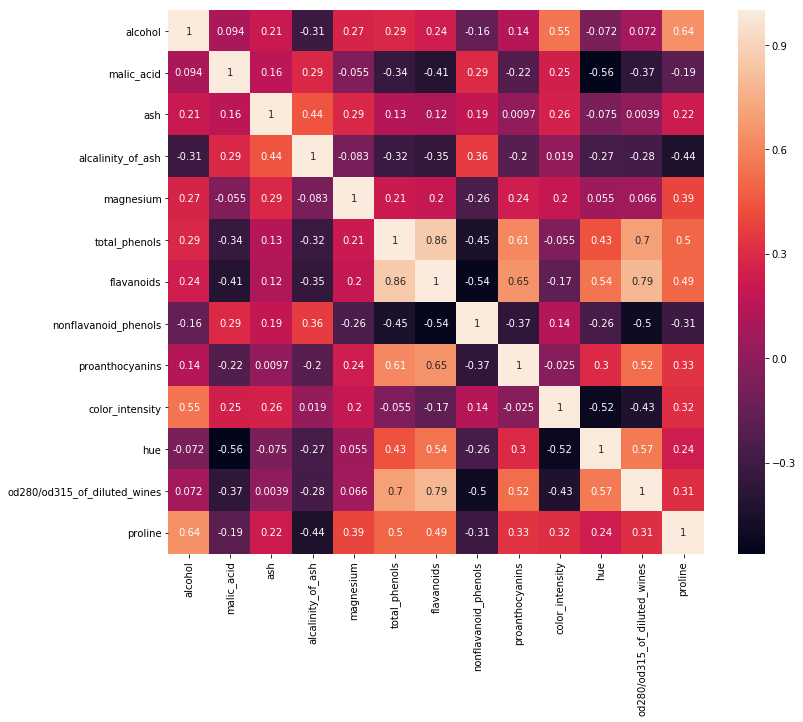

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(wine_corr, annot = True)

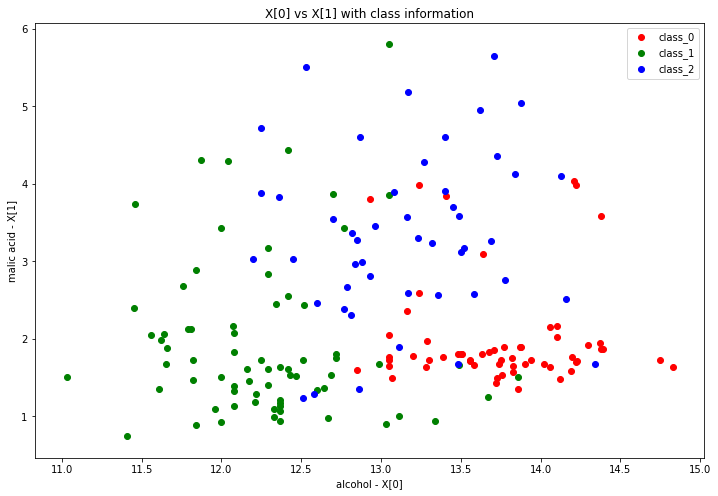

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.array(X)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, label = target_name)
    
plt.title('X[0] vs X[1] with class information')
plt.xlabel('alcohol - X[0]')
plt.ylabel('malic acid - X[1]')  

plt.legend()
plt.show()

### Perform LDA

https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

In [20]:
X_new = lda.fit_transform(X, y)

In [21]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [22]:
X_new.shape

(178, 2)

In [23]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224


## Visualize results

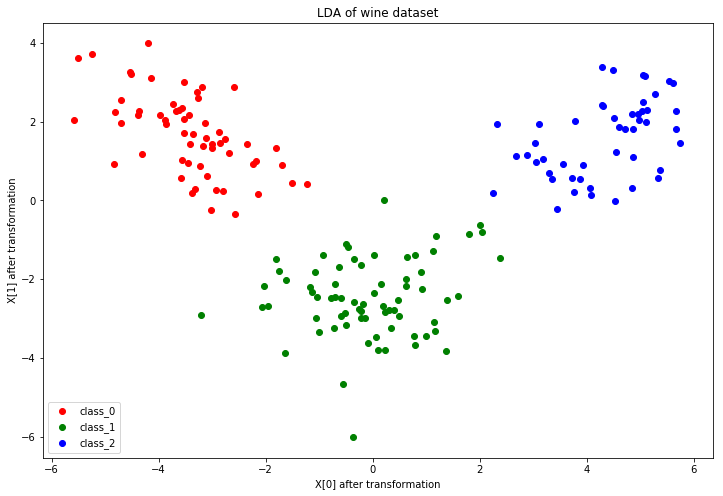

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, label = target_name)
    

plt.title('LDA of wine dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');

plt.legend()
plt.show()

### Correlations

In [25]:
lda_corr = X_new.corr()

lda_corr

,0,1
0,1.000000e+00,4.376151e-16
1,4.376151e-16,1.000000e+00
